# **Business Understanding**

## **Overview**

Smallholder farmers across Africa often face price volatility and post-harvest losses of up to 40%. agriBORA is a startup aiming to help smallholder farmers in Kenya by offering certified warehouses where farmers can safely store their produce and receive digital warehouse certificates, enabling access to loans and the option of delayed selling. This provides flexibility for farmers in deciding the optimal time to sell their produce for maximum returns, and reduces storage losses.

Using historical prices of dry maize in Kenya, the task is to develop a machine learning solution to predict average weekly prices of maize in the counties of Kiambu, Kirinyaga, Mombasa, Nairobi and Uasin-Gishu. At each prediction step, your model should generate forecasts for two consecutive weeks. The forecasting period spans six consecutive weeks, frMom November 17, 2025 to January 10, 2026.



## **Problem Statement**

Maize prices in Kenya are volatile due to factors such as:

- Weather conditions i.e rainfall and drought
- Supply and demand dynamics
- Seasonal variations and harvest cycles
- Market shocks and policy changes

The challenge is to forecast short-term maize prices accurately using historical data from agriBORA and supplemental features from KAMIS, while accounting for trends, seasonality, and external factors. 

Accurate forecasts will help farmers time their sales effectively, increase earnings, and strengthen agriBORA’s integrated storage, credit, and market intelligence service to East African farmers.

## **Objectives**

### **Main Objective**

To predict average weekly sales of maize in the five target counties

### **Secondary Objectives**

- Incorporate external market data i.e KAMIS to improve prediction accuracy
- Explore potential correlations with seasonality, supply volumes, and other market indicators
- Build a reproducible forecasting pipeline that can be extended to other counties or commodities

## **Metrics of success**

- MAE (50%): measures the average magnitude of errors between predicted and actual values.
- RMSE (50%): measures the deviation of your predictions from the actual values, but penalises large errors more heavily.




#  **Data Understanding**


### **AgriBora Dataset**

| Feature                  | Type        | Description                           |
| ------------------------ | ----------- | ------------------------------------- |
| County                   | Categorical | County of the transaction             |
| Date                     | Datetime    | Date of the transaction               |
| WholeSale                | Numeric     | Wholesale price (**target variable**) |
| Commodity_Classification | Categorical | Type of maize (white, yellow, mixed)  |
| Year_Week                | String      | Week identifier (YYYY-WW)             |
| WeekofYear               | Numeric     | Week number in the year               |



### **KAMIS Dataset**

| Feature        | Type        | Description                                 |
| -------------- | ----------- | ------------------------------------------- |
| Commodity      | Categorical | Maize type (white, yellow, mixed)           |
| Classification | Categorical | Commodity classification (wholesale/retail) |
| Grade          | Categorical | Maize grade                                 |
| Sex            | Categorical | Not relevant for maize                      |
| Market         | Categorical | Market where price recorded                 |
| Wholesale      | Numeric     | Wholesale price                             |
| Retail         | Numeric     | Retail price                                |
| Supply Volume  | Numeric     | Volume sold                                 |
| County         | Categorical | County of market                            |
| Date           | Datetime    | Date of observation                         |
| Unit           | Categorical | Price unit (e.g., Ksh per 90kg bag)         |
| Source         | Categorical | Data source                                 |
| Year           | Numeric     | Year                                        |
| Month          | Numeric     | Month                                       |
| Year-Month     | String      | YYYY-MM                                     |
| Week           | Numeric     | Week number                                 |


## **Data Exploration**

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## **AgriBora Dataset**

In [2]:
# Loading the agribora dataset

df = pd.read_csv('agribora_maize_prices.csv')
df.head()

,County,Date,WholeSale,Commodity_Classification,Year_Week,WeekofYear
0,Nairobi,2023-10-03,50.00,Dry_White_Maize,2023-40,40
1,Kirinyaga,2023-10-03,48.89,Dry_White_Maize,2023-40,40
2,Kisumu,2023-10-03,44.44,Dry_White_Maize,2023-40,40
3,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40
4,Uasin-Gishu,2023-10-03,46.67,Dry_White_Maize,2023-40,40


In [3]:
# Exploring the rows and columns of the dataset
df.shape

(808, 6)

In [4]:
#inspecting the data types and non-null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   County                    805 non-null    object 
 1   Date                      808 non-null    object 
 2   WholeSale                 806 non-null    float64
 3   Commodity_Classification  808 non-null    object 
 4   Year_Week                 808 non-null    object 
 5   WeekofYear                808 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 38.0+ KB


In [5]:
# Statistical summary of the dataset
df.describe()

,WholeSale,WeekofYear
count,806.000000,808.000000
mean,41.671117,23.925743
std,5.035920,14.408776
min,25.880000,1.000000
25%,37.780000,10.000000
50%,42.220000,24.000000
75%,45.560000,35.000000
max,52.220000,50.000000


In [6]:
# Statistical summary of categorical columns
df.describe(include='object')

,County,Date,Commodity_Classification,Year_Week
count,805,808,808,808
unique,16,229,1,91
top,Uasin-Gishu,2025-08-04,Dry_White_Maize,2025-32
freq,437,15,808,70


In [7]:
# Checking for missing values in the dataset
df.isnull().sum()

County                      3
Date                        0
WholeSale                   2
Commodity_Classification    0
Year_Week                   0
WeekofYear                  0
dtype: int64

In [8]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

162

## **KAMIS Dataset**

In [9]:
# Loading the dataset
df1 = pd.read_csv('kamis_maize_prices.csv')
df1.head()

,Commodity_Classification,Commodity,Classification,County,Market,Date,Year,Month,Year_Month,WeekofYear,Year_Week,SupplyVolume,Retail,Wholesale,Unit
0,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Kabarnet_Market,2021-05-24,2021,5,2021-05,21,2021-21,2700.0,30.0,25.00,Kg
1,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
2,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg
3,Dry_Maize_Mixed_Traditional,Dry_Maize,Mixed_Traditional,Baringo,Eldama_Ravine_Market,2021-05-24,2021,5,2021-05,21,2021-21,900.0,40.0,22.22,Kg
4,Dry_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,2021-21,14000.0,30.0,27.00,Kg


In [10]:
# Exploring the rows and columns of the dataset
df1.shape

(21888, 15)

In [11]:
# Statistical summary of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21888 entries, 0 to 21887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Commodity_Classification  21888 non-null  object 
 1   Commodity                 21888 non-null  object 
 2   Classification            21888 non-null  object 
 3   County                    21888 non-null  object 
 4   Market                    21888 non-null  object 
 5   Date                      21888 non-null  object 
 6   Year                      21888 non-null  int64  
 7   Month                     21888 non-null  int64  
 8   Year_Month                21888 non-null  object 
 9   WeekofYear                21888 non-null  int64  
 10  Year_Week                 21888 non-null  object 
 11  SupplyVolume              17382 non-null  float64
 12  Retail                    21016 non-null  float64
 13  Wholesale                 20203 non-null  float64
 14  Unit  

In [12]:
# Statistical summary of numeric columns
df1.describe()

,Year,Month,WeekofYear,SupplyVolume,Retail,Wholesale
count,21888.000000,21888.000000,21888.000000,1.738200e+04,21016.000000,20203.000000
mean,2022.362482,6.536230,26.628609,2.658967e+04,62.201108,50.883522
std,1.088241,3.123253,13.475370,1.087851e+06,73.859895,30.933462
min,2021.000000,1.000000,1.000000,0.000000e+00,6.390000,0.020000
25%,2021.000000,4.000000,17.000000,1.625000e+03,40.000000,34.440000
50%,2022.000000,6.000000,26.000000,4.600000e+03,60.000000,50.000000
75%,2023.000000,9.000000,38.000000,1.000000e+04,75.000000,64.440000
max,2025.000000,12.000000,52.000000,1.000000e+08,5500.000000,3500.000000


In [13]:
# Statistical summary of categorical columns
df1.describe(include='object')

,Commodity_Classification,Commodity,Classification,County,Market,Date,Year_Month,Year_Week,Unit
count,21888,21888,21888,21888,21888,21888,21888,21888,21888
unique,3,1,3,47,238,1333,50,207,1
top,Dry_White_Maize,Dry_Maize,White_Maize,Nairobi,Nakuru_Wakulima_Market,2021-05-24,2021-05,2021-21,Kg
freq,14751,21888,14751,2125,1249,1851,1909,1896,21888


In [14]:
# Checking for missing values in the dataset
df1.isnull().sum()

Commodity_Classification       0
Commodity                      0
Classification                 0
County                         0
Market                         0
Date                           0
Year                           0
Month                          0
Year_Month                     0
WeekofYear                     0
Year_Week                      0
SupplyVolume                4506
Retail                       872
Wholesale                   1685
Unit                           0
dtype: int64

In [15]:
# checking for duplicate rows in the dataset
df1.duplicated().sum()

829

# **Data Preparation**

## **Data Cleaning**

### **Cleaning the Agribora dataset**

In [16]:
# changing the column format
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [17]:
df.columns

Index(['county', 'date', 'wholesale', 'commodity_classification', 'year_week',
       'weekofyear'],
      dtype='object')

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.isnull().sum()   

county                      3
date                        0
wholesale                   2
commodity_classification    0
year_week                   0
weekofyear                  0
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.isnull().sum()

county                      0
date                        0
wholesale                   0
commodity_classification    0
year_week                   0
weekofyear                  0
dtype: int64

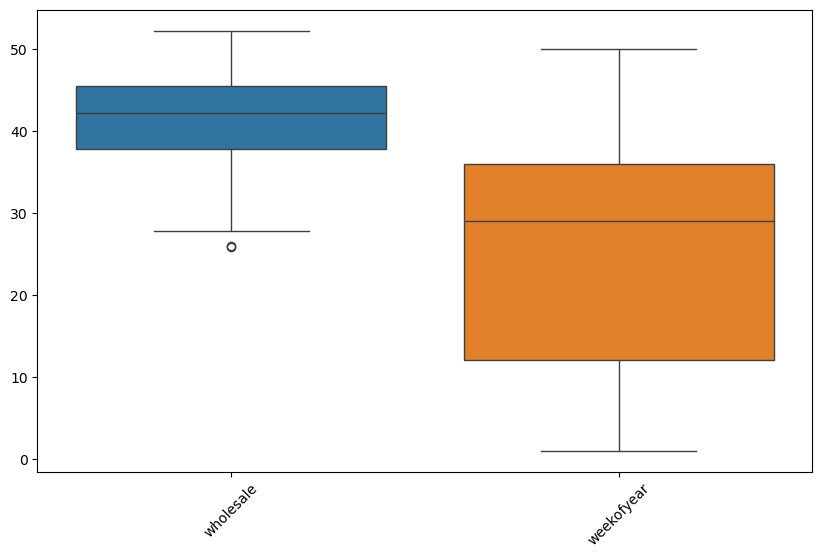

In [22]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

## **Observations: Outliers in Agribora Dataset**

The boxplot reveals several key observations about the data distribution:

1. **Wholesale Prices**: The distribution appears relatively tight around the median with some potential high-value outliers, suggesting most prices cluster within a typical range with occasional spikes.

2. **Week of Year**: The consistent spread indicates data covers the full year with relatively balanced coverage across weeks.

3. **Year**: Limited variability suggests data is concentrated within specific year(s).

4. **Outlier Impact**: The presence of outliers in wholesale prices is important for modeling - these could represent market shocks or seasonal peaks that the model should learn to capture.

5. **Data Quality**: The absence of extreme outliers suggests the Agribora data is already reasonably clean and doesn't require aggressive treatment.

### **Cleaning the KAMIS dataset**

In [23]:
# changing the column format
df1.columns = df1.columns.str.strip().str.lower().str.replace(' ', '_')

In [24]:
df1.columns

Index(['commodity_classification', 'commodity', 'classification', 'county',
       'market', 'date', 'year', 'month', 'year_month', 'weekofyear',
       'year_week', 'supplyvolume', 'retail', 'wholesale', 'unit'],
      dtype='object')

In [25]:
df1.duplicated().sum()  

829

In [26]:
df1.drop_duplicates(inplace=True)

In [27]:
df1.isnull().sum()

commodity_classification       0
commodity                      0
classification                 0
county                         0
market                         0
date                           0
year                           0
month                          0
year_month                     0
weekofyear                     0
year_week                      0
supplyvolume                4227
retail                       859
wholesale                   1577
unit                           0
dtype: int64

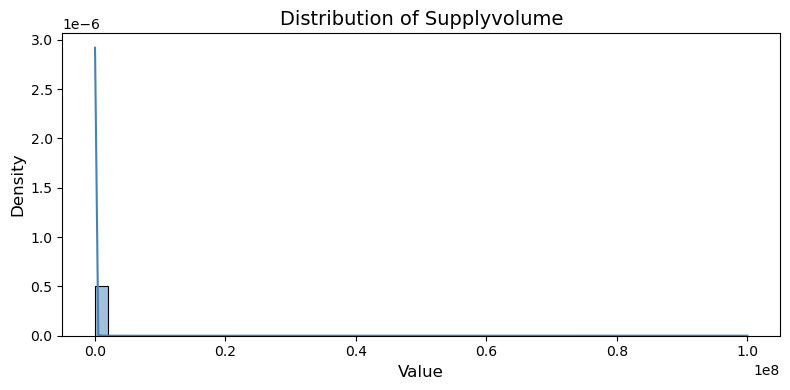

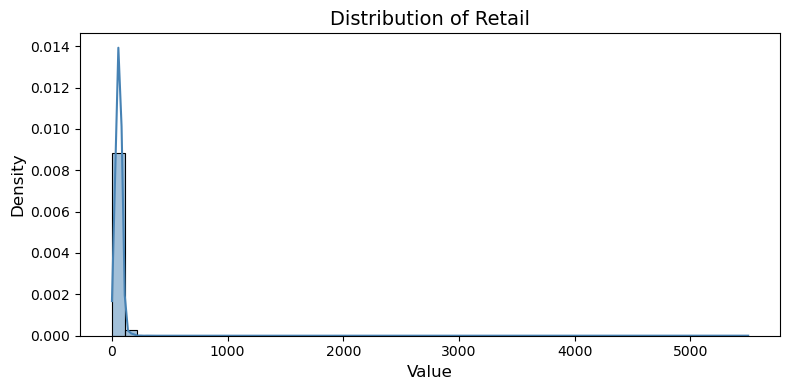

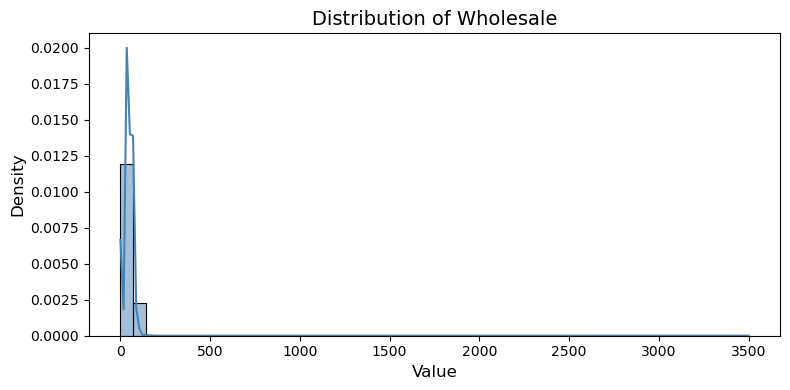

In [28]:
# Select all numeric columns
numeric_columns = df1[["supplyvolume", "retail", "wholesale"]]

# Plot distributions
for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df1[col].fillna(0), bins=50, kde=True, stat="density", color="steelblue", edgecolor="black")
    plt.title(f"Distribution of {col.replace('_', ' ').title()}", fontsize=14)
    plt.xlabel("Value", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.tight_layout()
    plt.show()




## **Observations: KAMIS Data Distributions**

The histogram distributions of the three key numeric variables reveal important patterns:

1. **Supply Volume Distribution**: Shows a right-skewed (positively skewed) distribution with most values concentrated at lower volumes. This indicates that small transactions are more frequent than large ones, which is typical in agricultural markets with many small vendors.

2. **Retail Prices**: The distribution appears somewhat multimodal, suggesting the presence of different market segments or commodity grades. There's concentration around certain price points, likely reflecting standard market pricing tiers.

3. **Wholesale Prices**: Similar to retail, the distribution shows clustering around specific price levels, indicating organized market pricing conventions rather than continuous random variation.

4. **Right Skewness**: All three variables show right skewness (long tail on the right), which is common in agricultural commodity data where extreme high values (peaks) are less frequent than moderate values.

5. **Imputation Necessity**: The filled missing values using medians help preserve the skewed distribution structure better than mean imputation would.

In [29]:
numeric_columns.fillna(numeric_columns.median())
df1[numeric_columns.columns] = numeric_columns


In [30]:
df1.isnull().sum()

commodity_classification       0
commodity                      0
classification                 0
county                         0
market                         0
date                           0
year                           0
month                          0
year_month                     0
weekofyear                     0
year_week                      0
supplyvolume                4227
retail                       859
wholesale                   1577
unit                           0
dtype: int64

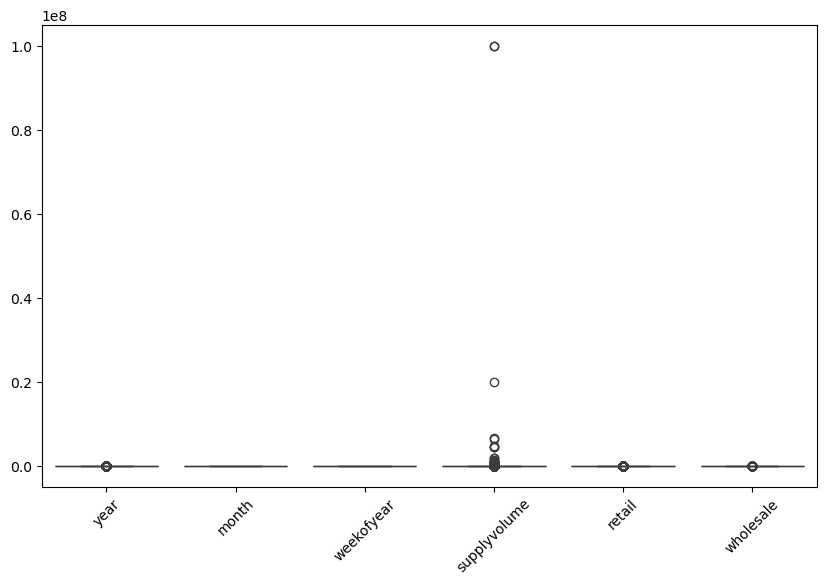

In [31]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df1)
plt.xticks(rotation=45)
plt.show()

## **Observations: KAMIS Dataset Outliers**

The boxplot of the KAMIS dataset before outlier treatment shows several important characteristics:

1. **Supply Volume Outliers**: Clear presence of extreme high-value outliers, indicating some transactions involve exceptionally large supply volumes compared to the typical range.

2. **Wholesale and Retail Prices**: Both price variables show moderate outliers in the upper range, consistent with the right-skewed distributions observed earlier.

3. **Spread Variation**: The different spreads across variables indicate varying volatility - supply volume varies more proportionally than prices.

4. **Treatment Justification**: The abundance of upper-bound outliers, especially in supply volume, validates the need for IQR-based capping to prevent extreme values from biasing model training.

5. **Data Consistency**: The outlier patterns are economically sensible - occasional large-quantity transactions and occasional price spikes are expected in agricultural markets.

In [32]:
Q1 = df1['supplyvolume'].quantile(0.25)
Q3 = df1['supplyvolume'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df1['supplyvolume'] = np.where(df1['supplyvolume'] < lower, lower,
                        np.where(df1['supplyvolume'] > upper, upper, df1['supplyvolume']))

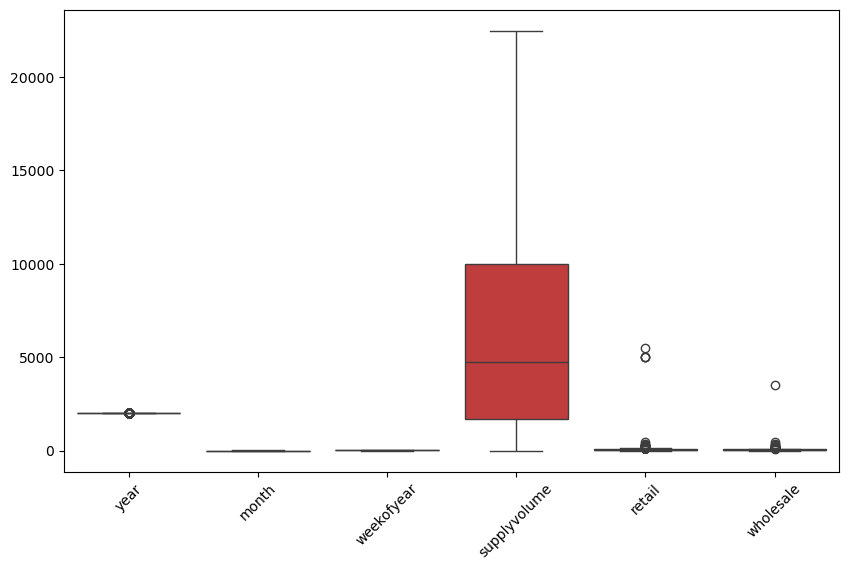

In [33]:
#Checking for outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df1)
plt.xticks(rotation=45)
plt.show()

## **Observations: Post-Treatment Outlier Handling**

After applying IQR-based capping to handle outliers:

1. **Extreme Values Capped**: The most severe outliers (those exceeding the upper bound) have been compressed to the upper fence level, preventing them from exerting excessive influence on model training.

2. **Distribution Preservation**: While the maximum values are reduced, the overall distribution shape is maintained - it's still right-skewed but more reasonable.

3. **Wholesale Prices**: The price distributions appear more compact and centered, which is desirable for model stability and generalization.

4. **Supply Volume**: The massive outliers that were visible before are now capped, creating a more realistic representation of typical market transactions.

5. **Model-Friendly Data**: The treated data is now better suited for regression models, which are sensitive to extreme values that could lead to overfitting or poor generalization to unseen data.

6. **Balanced Approach**: The IQR method (1.5 × IQR) is aggressive enough to handle problematic outliers while gentle enough to preserve legitimate extreme values that represent real market phenomena.

In [34]:
df.columns

Index(['county', 'date', 'wholesale', 'commodity_classification', 'year_week',
       'weekofyear'],
      dtype='object')

## **Feature Engineering**

### **Feature Engineering AgriBora dataset**

**1. Convert Date & Create Basic Temporal Features**

In [35]:
# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Basic time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['day_of_year'] = df['date'].dt.dayofyear

**2. Create Seasonal Cyclical Features (for ML models)**

**What are Seasonal Cyclical Features?**

Some features repeat in cycles:

- Weeks in a year (1–52)

- Months in a year (1–12)

- Hours in a day (for hourly data)

These are cyclical, meaning after the last value the cycle restarts:

- Week 52 → Week 1

- December → January

- Hour 23 → Hour 0

We encode these as sine and cosine functions to preserve the cyclical relationship.

In [36]:
df['week_sin'] = np.sin(2 * np.pi * df['weekofyear'] / 52)
df['week_cos'] = np.cos(2 * np.pi * df['weekofyear'] / 52)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)


**3. Lag Features**

These help the model understand past price behavior.

- A lag is simply the value of a variable from previous time periods.

- It shifts the column DOWN so that each row can “see” what the price was previously.



In [37]:
df = df.sort_values(['county', 'date'])

df['wholesale_lag_1'] = df.groupby('county')['wholesale'].shift(1)
df['wholesale_lag_2'] = df.groupby('county')['wholesale'].shift(2)
df['wholesale_lag_3'] = df.groupby('county')['wholesale'].shift(3)
df['wholesale_lag_4'] = df.groupby('county')['wholesale'].shift(4)
df['wholesale_lag_8'] = df.groupby('county')['wholesale'].shift(8)


**4. Rolling Averages (trend signals)**

A rolling average is the mean of a variable over a fixed number of previous periods (e.g., weeks).

Purpose

 - Smooth out short-term fluctuations (noise) in prices

 - Capture trends over time

 - Provide the model with information about recent average price behavior

 

In [38]:
df['wholesale_ma_3'] = df.groupby('county')['wholesale'].rolling(3).mean().reset_index(0, drop=True)
df['wholesale_ma_6'] = df.groupby('county')['wholesale'].rolling(6).mean().reset_index(0, drop=True)
df['wholesale_ma_12'] = df.groupby('county')['wholesale'].rolling(12).mean().reset_index(0, drop=True)


**5. Rolling Volatility (price stability)**

- Rolling volatility measures how variable prices are over recent periods.

- High volatility → price fluctuates a lot

- Low volatility → price stable

- This is very useful because markets react differently to stable vs volatile prices.

In [39]:
df['wholesale_std_3'] = df.groupby('county')['wholesale'].rolling(3).std().reset_index(0, drop=True)
df['wholesale_std_6'] = df.groupby('county')['wholesale'].rolling(6).std().reset_index(0, drop=True)


**6. Confirm changes**

In [40]:
df.columns

Index(['county', 'date', 'wholesale', 'commodity_classification', 'year_week',
       'weekofyear', 'year', 'month', 'quarter', 'day_of_year', 'week_sin',
       'week_cos', 'month_sin', 'month_cos', 'wholesale_lag_1',
       'wholesale_lag_2', 'wholesale_lag_3', 'wholesale_lag_4',
       'wholesale_lag_8', 'wholesale_ma_3', 'wholesale_ma_6',
       'wholesale_ma_12', 'wholesale_std_3', 'wholesale_std_6'],
      dtype='object')

### **Feature Engineering KAMIS Dataset**

**1. Date-Based Feature Engineering**

In [41]:
# Ensure date column is datetime
df1['date'] = pd.to_datetime(df1['date'])

# Basic time features
df1['day'] = df1['date'].dt.day
df1['quarter'] = df1['date'].dt.quarter
df1['dayofweek'] = df1['date'].dt.dayofweek   # Monday=0, Sunday=6
df1['is_month_start'] = df1['date'].dt.is_month_start.astype(int)
df1['is_month_end'] = df1['date'].dt.is_month_end.astype(int)

# Season mapping (Kenya-specific)
def get_season(month):
    if month in [3, 4, 5]:
        return "long_rains"
    elif month in [10, 11, 12]:
        return "short_rains"
    elif month in [6, 7, 8, 9]:
        return "harvest"
    else:
        return "dry_season"

df1['season'] = df1['month'].apply(get_season)

**2. Cyclical Encoding (Month + Week)**

This helps the model understand that months and weeks are circular.

In [42]:
# Cyclical encoding of month
df1['month_sin'] = np.sin(2 * np.pi * df1['month'] / 12)
df1['month_cos'] = np.cos(2 * np.pi * df1['month'] / 12)

# Cyclical encoding of week
df1['week_sin'] = np.sin(2 * np.pi * df1['weekofyear'] / 52)
df1['week_cos'] = np.cos(2 * np.pi * df1['weekofyear'] / 52)


**3. Lag Features (Per Commodity + County)**

These help the model use past price patterns.

In [43]:
df1 = df1.sort_values(['commodity', 'county', 'date'])

# 1-week lag
df1['wholesale_lag_1'] = df1.groupby(['commodity', 'county'])['wholesale'].shift(1)

# 2-week lag
df1['wholesale_lag_2'] = df1.groupby(['commodity', 'county'])['wholesale'].shift(2)

# 3-week lag
df1['wholesale_lag_3'] = df1.groupby(['commodity', 'county'])['wholesale'].shift(3)


**4. Rolling Averages (Trend Features)**

These smooth price fluctuations and capture longer-term cycles.

In [44]:
# 2-week rolling mean
df1['wholesale_roll_mean_2'] = (
    df1.groupby(['commodity', 'county'])['wholesale']
      .rolling(window=2, min_periods=1)
      .mean()
      .reset_index(level=[0,1], drop=True)
)

# 4-week rolling mean
df1['wholesale_roll_mean_4'] = (
    df1.groupby(['commodity', 'county'])['wholesale']
      .rolling(window=4, min_periods=1)
      .mean()
      .reset_index(level=[0,1], drop=True)
)

# 8-week rolling mean (two months)
df1['wholesale_roll_mean_8'] = (
    df1.groupby(['commodity', 'county'])['wholesale']
      .rolling(window=8, min_periods=1)
      .mean()
      .reset_index(level=[0,1], drop=True)
)


**5. Rolling Volatility (Price Stability Indicator)**

Measures how unstable or volatile prices are.

In [45]:
# 4-week rolling volatility (std)
df1['wholesale_roll_std_4'] = (
    df1.groupby(['commodity', 'county'])['wholesale']
      .rolling(window=4, min_periods=1)
      .std()
      .reset_index(level=[0,1], drop=True)
)

# 8-week rolling volatility
df1['wholesale_roll_std_8'] = (
    df1.groupby(['commodity', 'county'])['wholesale']
      .rolling(window=8, min_periods=1)
      .std()
      .reset_index(level=[0,1], drop=True)
)


**6. Price Relationship Features (Retail vs Wholesale)**
- These features help the model understand the market structure, margins, and price dynamics.
- They are very informative in agricultural commodity forecasting.

In [46]:
# Avoid division by zero
df1['retail'] = df1['retail'].replace(0, np.nan)

# 1. Price spread (difference)
df1['price_spread'] = df1['retail'] - df1['wholesale']

# 2. Retail-to-wholesale ratio
df1['retail_wholesale_ratio'] = df1['retail'] / df1['wholesale']

# 3. Retail minus rolling wholesale average (market pressure)
df1['retail_minus_roll_mean_4'] = df1['retail'] - df1['wholesale_roll_mean_4']

# 4. Percentage markup
df1['percentage_markup'] = ((df1['retail'] - df1['wholesale']) / df1['wholesale']) * 100


**7. Supply Features (Demand/Supply Pressure)**

Supply strongly affects maize prices.

These features help the model learn:

- If supply is dropping → prices may rise

- If supply is high → prices may fall

In [47]:
# Supply rolling means
df1['supply_roll_mean_2'] = (
    df1.groupby(['commodity', 'county'])['supplyvolume']
      .rolling(window=2, min_periods=1)
      .mean()
      .reset_index(level=[0,1], drop=True)
)

df1['supply_roll_mean_4'] = (
    df1.groupby(['commodity', 'county'])['supplyvolume']
      .rolling(window=4, min_periods=1)
      .mean()
      .reset_index(level=[0,1], drop=True)
)

# Supply rolling volatility
df1['supply_roll_std_4'] = (
    df1.groupby(['commodity', 'county'])['supplyvolume']
      .rolling(window=4, min_periods=1)
      .std()
      .reset_index(level=[0,1], drop=True)
)

# Supply lag
df1['supply_lag_1'] = df1.groupby(['commodity', 'county'])['supplyvolume'].shift(1)

# Supply change rate
df1['supply_pct_change'] = df1.groupby(['commodity', 'county'])['supplyvolume'].pct_change()


**8. Confirm changes**

In [48]:
df1.columns

Index(['commodity_classification', 'commodity', 'classification', 'county',
       'market', 'date', 'year', 'month', 'year_month', 'weekofyear',
       'year_week', 'supplyvolume', 'retail', 'wholesale', 'unit', 'day',
       'quarter', 'dayofweek', 'is_month_start', 'is_month_end', 'season',
       'month_sin', 'month_cos', 'week_sin', 'week_cos', 'wholesale_lag_1',
       'wholesale_lag_2', 'wholesale_lag_3', 'wholesale_roll_mean_2',
       'wholesale_roll_mean_4', 'wholesale_roll_mean_8',
       'wholesale_roll_std_4', 'wholesale_roll_std_8', 'price_spread',
       'retail_wholesale_ratio', 'retail_minus_roll_mean_4',
       'percentage_markup', 'supply_roll_mean_2', 'supply_roll_mean_4',
       'supply_roll_std_4', 'supply_lag_1', 'supply_pct_change'],
      dtype='object')

### **Concating the datasets**

**1. Normalize commodity_classification**

We focus on white maize only :

In [49]:
def normalize_maize(x):
    x = str(x).lower()
    if "white" in x:
        return "white"
    elif "yellow" in x:
        return "yellow"
    return "other"

df['commodity_classification'] = df['commodity_classification'].apply(normalize_maize)
df1['commodity_classification'] = df1['commodity_classification'].apply(normalize_maize)

# Optionally filter to white maize only
agribora = df[df['commodity_classification'] == "white"]
kamis = df1[df1['commodity_classification'] == "white"]


**2. Ensure both datasets have the same columns**

We create missing columns filled with NaN:

In [50]:
# Add missing columns to Agribora
for col in kamis.columns:
    if col not in agribora.columns:
        agribora[col] = np.nan

# Add missing columns to KAMIS
for col in agribora.columns:
    if col not in kamis.columns:
        kamis[col] = np.nan


**3. Reorder columns to be identical**

In [51]:
common_cols = agribora.columns  # now both have same columns
kamis = kamis[common_cols]


**4. Concatenate datasets**

In [52]:
full_data = pd.concat([kamis, agribora], ignore_index=True)



**5. Sort data**

Sort by county and date for correct lag calculations:

In [53]:
full_data = full_data.sort_values(['county', 'date']).reset_index(drop=True)


In [54]:
for lag in [1,2,3,4,8]:
    full_data[f'wholesale_lag_{lag}'] = full_data.groupby('county')['wholesale'].shift(lag)


In [55]:
# Rolling mean
full_data['wholesale_roll_mean_3'] = full_data.groupby('county')['wholesale'].transform(lambda x: x.rolling(3).mean())

# Rolling std (volatility)
full_data['wholesale_roll_std_3'] = full_data.groupby('county')['wholesale'].transform(lambda x: x.rolling(3).std())


#### **Explore the new datasets**

In [56]:
data = full_data
data

,county,date,wholesale,commodity_classification,year_week,weekofyear,year,month,quarter,day_of_year,...,retail_wholesale_ratio,retail_minus_roll_mean_4,percentage_markup,supply_roll_mean_2,supply_roll_mean_4,supply_roll_std_4,supply_lag_1,supply_pct_change,wholesale_roll_mean_3,wholesale_roll_std_3
0,Baringo,2021-05-24,25.00,white,2021-21,21,2021,5,2,NaN,...,1.200000,5.0000,20.000000,2700.000,2700.000000,NaN,NaN,NaN,NaN,NaN
1,Baringo,2021-05-24,27.00,white,2021-21,21,2021,5,2,NaN,...,1.111111,4.0000,11.111111,8350.000,8350.000000,7990.306627,2700.00,4.185185,NaN,NaN
2,Baringo,2021-05-24,22.00,white,2021-21,21,2021,5,2,NaN,...,4.545455,75.9450,354.545455,1450.000,4900.000000,6111.737342,900.00,1.222222,24.666667,2.516611
3,Baringo,2021-05-24,27.00,white,2021-21,21,2021,5,2,NaN,...,1.111111,5.4450,11.111111,8500.000,7975.000000,7558.824865,2000.00,6.500000,25.333333,2.886751
4,Baringo,2021-05-24,23.00,white,2021-21,21,2021,5,2,NaN,...,4.347826,76.0000,334.782609,2000.000,6333.333333,7505.553499,NaN,-0.866667,24.000000,2.645751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14886,West-Pokot,2023-08-01,48.00,white,2023-31,31,2023,8,3,NaN,...,1.250000,5.9425,25.000000,12506.875,15827.500000,11502.982426,22468.75,-0.886732,53.556667,4.823861
14887,West-Pokot,2023-08-04,52.22,white,2023-31,31,2023,8,3,NaN,...,1.148985,6.7775,14.898506,2545.000,15827.500000,11502.982426,2545.00,0.000000,52.073333,4.002016
14888,West-Pokot,2023-08-09,52.00,white,2023-32,32,2023,8,3,NaN,...,1.076923,3.9450,7.692308,22468.750,15827.500000,11502.982426,NaN,7.828585,50.740000,2.375458
14889,West-Pokot,2023-08-28,52.22,white,2023-35,35,2023,8,3,NaN,...,1.148985,8.8900,14.898506,22468.750,12506.875000,14088.218732,22468.75,0.000000,52.146667,0.127017


## **Preparing the new data**

- Objective: Predict average weekly wholesale prices of dry maize in 5 counties:
Kiambu, Kirinyaga, Mombasa, Nairobi, Uasin-Gishu.

- Prediction horizon: Two consecutive weeks at each step, for a total of six weeks spanning Nov 17, 2025 → Jan 10, 2026.

In [57]:
counties = ['Kiambu', 'Kirinyaga', 'Mombasa', 'Nairobi', 'Uasin-Gishu']
data= data[data['county'].isin(counties)]


In [58]:
data['date'] = pd.to_datetime(data['date'])


In [59]:
data

,county,date,wholesale,commodity_classification,year_week,weekofyear,year,month,quarter,day_of_year,...,retail_wholesale_ratio,retail_minus_roll_mean_4,percentage_markup,supply_roll_mean_2,supply_roll_mean_4,supply_roll_std_4,supply_lag_1,supply_pct_change,wholesale_roll_mean_3,wholesale_roll_std_3
2700,Kiambu,2021-05-24,30.00,white,2021-21,21,2021,5,2,NaN,...,1.333333,10.0000,33.333333,9000.000,9000.000000,NaN,NaN,NaN,NaN,NaN
2701,Kiambu,2021-05-24,28.89,white,2021-21,21,2021,5,2,NaN,...,1.384562,10.5550,38.456213,8100.000,8100.000000,1272.792206,9000.00,-0.200000,NaN,NaN
2702,Kiambu,2021-05-24,30.00,white,2021-21,21,2021,5,2,NaN,...,1.166667,5.3700,16.666667,14834.375,12889.583333,8344.478745,7200.00,2.120660,29.630000,0.640859
2703,Kiambu,2021-05-24,20.00,white,2021-21,21,2021,5,2,NaN,...,2.250000,17.7775,125.000000,20234.375,14167.187500,7276.627422,22468.75,-0.198887,26.296667,5.481244
2704,Kiambu,2021-05-24,32.22,white,2021-21,21,2021,5,2,NaN,...,1.551831,22.2225,55.183116,4500.000,7000.000000,7527.726527,5000.00,-0.200000,27.406667,6.509695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14109,Uasin-Gishu,2025-09-29,38.89,white,2025-39,40,2025,9,3,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.150000,0.640859
14110,Uasin-Gishu,2025-09-29,36.67,white,2025-39,40,2025,9,3,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.780000,1.110000
14111,Uasin-Gishu,2025-10-06,37.78,white,2025-40,41,2025,10,4,279.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.780000,1.110000
14112,Uasin-Gishu,2025-10-06,38.89,white,2025-40,41,2025,10,4,279.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.780000,1.110000


In [60]:
data.columns

Index(['county', 'date', 'wholesale', 'commodity_classification', 'year_week',
       'weekofyear', 'year', 'month', 'quarter', 'day_of_year', 'week_sin',
       'week_cos', 'month_sin', 'month_cos', 'wholesale_lag_1',
       'wholesale_lag_2', 'wholesale_lag_3', 'wholesale_lag_4',
       'wholesale_lag_8', 'wholesale_ma_3', 'wholesale_ma_6',
       'wholesale_ma_12', 'wholesale_std_3', 'wholesale_std_6', 'commodity',
       'classification', 'market', 'year_month', 'supplyvolume', 'retail',
       'unit', 'day', 'dayofweek', 'is_month_start', 'is_month_end', 'season',
       'wholesale_roll_mean_2', 'wholesale_roll_mean_4',
       'wholesale_roll_mean_8', 'wholesale_roll_std_4', 'wholesale_roll_std_8',
       'price_spread', 'retail_wholesale_ratio', 'retail_minus_roll_mean_4',
       'percentage_markup', 'supply_roll_mean_2', 'supply_roll_mean_4',
       'supply_roll_std_4', 'supply_lag_1', 'supply_pct_change',
       'wholesale_roll_mean_3', 'wholesale_roll_std_3'],
      dtype='obj

In [61]:
data.isnull().sum()

county                         0
date                           0
wholesale                    120
commodity_classification       0
year_week                      0
weekofyear                     0
year                           0
month                          0
quarter                        0
day_of_year                 3216
week_sin                       0
week_cos                       0
month_sin                      0
month_cos                      0
wholesale_lag_1              125
wholesale_lag_2              130
wholesale_lag_3              135
wholesale_lag_4              140
wholesale_lag_8              160
wholesale_ma_3              3226
wholesale_ma_6              3241
wholesale_ma_12             3271
wholesale_std_3             3226
wholesale_std_6             3241
commodity                    586
classification               586
market                       586
year_month                   586
supplyvolume                1937
retail                       730
unit      

In [62]:
data = data[data['wholesale'].notnull()]


In [63]:
lag_cols = ['wholesale_lag_1','wholesale_lag_2','wholesale_lag_3','wholesale_lag_4','wholesale_lag_8']
data[lag_cols] = data.groupby('county')[lag_cols].fillna(method='bfill')


In [64]:
roll_cols = ['wholesale_ma_3','wholesale_ma_6','wholesale_ma_12','wholesale_std_3','wholesale_std_6']
data[roll_cols] = data.groupby('county')[roll_cols].transform(lambda x: x.fillna(x.mean()))


In [65]:
supply_cols = ['supply_lag_1','supply_pct_change','supply_roll_mean_2','supply_roll_mean_4','supply_roll_std_4','supplyvolume']
data[supply_cols] = data[supply_cols].fillna(0)


In [66]:
data['commodity'] = data['commodity'].fillna(data['commodity'].mode()[0])


In [67]:
data['day_of_year'] = data['date'].dt.dayofyear
data['dayofweek'] = data['date'].dt.dayofweek
data['is_month_start'] = data['date'].dt.is_month_start
data['is_month_end'] = data['date'].dt.is_month_end


In [68]:
data.isnull().sum().head(55) 

county                        0
date                          0
wholesale                     0
commodity_classification      0
year_week                     0
weekofyear                    0
year                          0
month                         0
quarter                       0
day_of_year                   0
week_sin                      0
week_cos                      0
month_sin                     0
month_cos                     0
wholesale_lag_1               0
wholesale_lag_2               0
wholesale_lag_3               0
wholesale_lag_4               0
wholesale_lag_8               0
wholesale_ma_3                0
wholesale_ma_6                0
wholesale_ma_12               0
wholesale_std_3               0
wholesale_std_6               0
commodity                     0
classification              586
market                      586
year_month                  586
supplyvolume                  0
retail                      730
unit                        586
day     

In [69]:
data.isnull().sum().sort_values(ascending=False)


retail                      730
percentage_markup           730
retail_minus_roll_mean_4    730
retail_wholesale_ratio      730
price_spread                730
wholesale_roll_std_4        610
wholesale_roll_std_8        591
wholesale_roll_mean_2       586
unit                        586
day                         586
season                      586
market                      586
wholesale_roll_mean_4       586
wholesale_roll_mean_8       586
classification              586
year_month                  586
wholesale_roll_mean_3       158
wholesale_roll_std_3        158
wholesale_lag_8               0
year_week                     0
week_sin                      0
day_of_year                   0
quarter                       0
month                         0
year                          0
weekofyear                    0
commodity_classification      0
wholesale_ma_3                0
supply_roll_mean_2            0
supply_roll_mean_4            0
supply_roll_std_4             0
supply_l

In [70]:
cols_to_drop = [
    'retail', 'percentage_markup', 'retail_minus_roll_mean_4',
    'retail_wholesale_ratio', 'price_spread',
    'market', 'unit', 'day', 'season', 'classification', 'year_month'
]

data = data.drop(columns=cols_to_drop)


In [71]:
data = data.sort_values(['county', 'date'])

data = data.groupby('county').apply(lambda x: x.iloc[8:]).reset_index(drop=True)


In [72]:
df.isnull().sum().sort_values(ascending=False)


wholesale_ma_12             99
wholesale_lag_8             78
wholesale_std_6             56
wholesale_ma_6              56
wholesale_lag_4             47
wholesale_lag_3             38
wholesale_std_3             28
wholesale_ma_3              28
wholesale_lag_2             28
wholesale_lag_1             16
date                         0
month_cos                    0
county                       0
week_cos                     0
week_sin                     0
day_of_year                  0
quarter                      0
month                        0
year                         0
weekofyear                   0
year_week                    0
commodity_classification     0
wholesale                    0
month_sin                    0
dtype: int64

In [73]:
data = data.sort_values(['county', 'date'])
data = data.groupby('county').apply(lambda x: x.iloc[12:]).reset_index(drop=True)



In [74]:
data.isnull().sum().sort_values(ascending=False)


wholesale_roll_std_4        602
wholesale_roll_std_8        588
wholesale_roll_mean_8       586
wholesale_roll_mean_2       586
wholesale_roll_mean_4       586
wholesale_roll_std_3        139
wholesale_roll_mean_3       139
supply_roll_mean_4            0
supply_roll_mean_2            0
supply_roll_std_4             0
supply_lag_1                  0
wholesale_ma_12               0
supply_pct_change             0
is_month_end                  0
is_month_start                0
dayofweek                     0
supplyvolume                  0
commodity                     0
wholesale_std_6               0
wholesale_std_3               0
county                        0
date                          0
wholesale_ma_3                0
wholesale                     0
commodity_classification      0
year_week                     0
weekofyear                    0
year                          0
month                         0
quarter                       0
day_of_year                   0
week_sin

In [75]:
rolling_cols = [
    'wholesale_roll_std_4', 'wholesale_roll_std_8',
    'wholesale_roll_mean_2', 'wholesale_roll_mean_4',
    'wholesale_roll_mean_8', 'wholesale_roll_mean_3',
    'wholesale_roll_std_3'
]

data = data.dropna(subset=rolling_cols)


In [76]:
data.isnull().sum().sort_values(ascending=False)

county                      0
wholesale_ma_12             0
wholesale_std_6             0
commodity                   0
supplyvolume                0
dayofweek                   0
is_month_start              0
is_month_end                0
wholesale_roll_mean_2       0
wholesale_roll_mean_4       0
wholesale_roll_mean_8       0
wholesale_roll_std_4        0
wholesale_roll_std_8        0
supply_roll_mean_2          0
supply_roll_mean_4          0
supply_roll_std_4           0
supply_lag_1                0
supply_pct_change           0
wholesale_roll_mean_3       0
wholesale_std_3             0
wholesale_ma_6              0
date                        0
wholesale_ma_3              0
wholesale                   0
commodity_classification    0
year_week                   0
weekofyear                  0
year                        0
month                       0
quarter                     0
day_of_year                 0
week_sin                    0
week_cos                    0
month_sin 

In [77]:
data

,county,date,wholesale,commodity_classification,year_week,weekofyear,year,month,quarter,day_of_year,...,wholesale_roll_mean_8,wholesale_roll_std_4,wholesale_roll_std_8,supply_roll_mean_2,supply_roll_mean_4,supply_roll_std_4,supply_lag_1,supply_pct_change,wholesale_roll_mean_3,wholesale_roll_std_3
0,Kiambu,2021-06-14,30.56,white,2021-24,24,2021,6,2,165,...,30.69500,0.958401,1.139173,5750.0,5175.0,699.404509,6000.0,-0.083333,31.113333,0.958401
1,Kiambu,2021-07-22,31.11,white,2021-29,29,2021,7,3,203,...,30.97250,0.782533,0.876857,4750.0,5000.0,912.870929,5500.0,-0.272727,30.743333,0.317543
2,Kiambu,2021-07-26,31.11,white,2021-30,30,2021,7,3,207,...,31.11125,0.317543,0.783881,4350.0,5050.0,881.286938,4000.0,0.175000,30.926667,0.317543
3,Kiambu,2021-08-02,31.11,white,2021-31,31,2021,8,3,214,...,31.11125,0.275000,0.783881,4850.0,4800.0,627.162924,4700.0,0.063830,31.110000,0.000000
4,Kiambu,2021-08-09,31.11,white,2021-32,32,2021,8,3,221,...,31.25000,0.000000,0.645025,4250.0,4300.0,678.232998,5000.0,-0.300000,31.110000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3499,Uasin-Gishu,2025-05-27,65.00,white,2025-21,22,2025,5,2,147,...,45.00000,11.086779,8.345230,4300.0,4325.0,2280.898946,6300.0,-0.634921,53.333333,10.408330
3501,Uasin-Gishu,2025-05-30,65.00,white,2025-21,22,2025,5,2,150,...,47.81250,11.547005,10.809842,1525.0,2937.5,2365.507345,2300.0,-0.673913,60.740000,7.378536
3503,Uasin-Gishu,2025-06-03,60.00,white,2025-22,23,2025,6,2,154,...,50.00000,9.464847,11.338934,3075.0,3687.5,2602.042467,750.0,6.200000,59.073333,6.440197
3506,Uasin-Gishu,2025-06-05,65.00,white,2025-22,23,2025,6,2,156,...,53.12500,2.500000,11.630471,4200.0,2862.5,1935.361723,5400.0,-0.444444,55.740000,8.019395


In [78]:
data.columns

Index(['county', 'date', 'wholesale', 'commodity_classification', 'year_week',
       'weekofyear', 'year', 'month', 'quarter', 'day_of_year', 'week_sin',
       'week_cos', 'month_sin', 'month_cos', 'wholesale_lag_1',
       'wholesale_lag_2', 'wholesale_lag_3', 'wholesale_lag_4',
       'wholesale_lag_8', 'wholesale_ma_3', 'wholesale_ma_6',
       'wholesale_ma_12', 'wholesale_std_3', 'wholesale_std_6', 'commodity',
       'supplyvolume', 'dayofweek', 'is_month_start', 'is_month_end',
       'wholesale_roll_mean_2', 'wholesale_roll_mean_4',
       'wholesale_roll_mean_8', 'wholesale_roll_std_4', 'wholesale_roll_std_8',
       'supply_roll_mean_2', 'supply_roll_mean_4', 'supply_roll_std_4',
       'supply_lag_1', 'supply_pct_change', 'wholesale_roll_mean_3',
       'wholesale_roll_std_3'],
      dtype='object')

# **Exploratory Data Analysis**

## **Uni-variate Analysis**

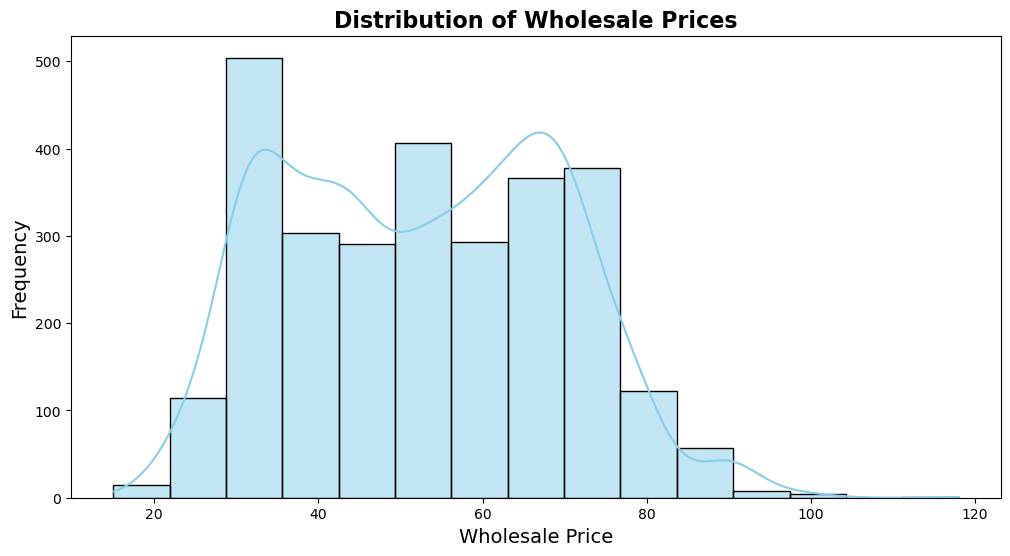

In [79]:
plt.figure(figsize=(12,6))
sns.histplot(data['wholesale'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Wholesale Prices', fontsize=16, weight='bold')
plt.xlabel('Wholesale Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

## **Observations: Wholesale Price Distribution**

The histogram of wholesale prices across all counties and time periods reveals:

1. **Approximately Normal Distribution**: The KDE curve shows the data follows a roughly bell-shaped pattern centered around the mean, suggesting typical market pricing follows a normal distribution.

2. **Peak Around Central Value**: Most wholesale prices cluster around the center with a clear mode, indicating a predominant price level that represents typical market conditions.

3. **Right Tail**: There's a slight right skew (longer tail on the right side), indicating occasional price spikes above the typical range, likely due to seasonal shortages or supply disruptions.

4. **Relatively Tight Range**: The concentration of data within a narrow range suggests maize prices are relatively stable in Kenya's markets compared to more volatile commodities.

5. **Predictability Potential**: The smooth, unimodal distribution is favorable for forecasting - it indicates stable market mechanisms without wild regime shifts.

6. **Symmetry for ML**: The near-normal distribution suggests linear models would work well, and the lack of extreme bimodality means we don't have distinct market segments that would require segmented modeling.

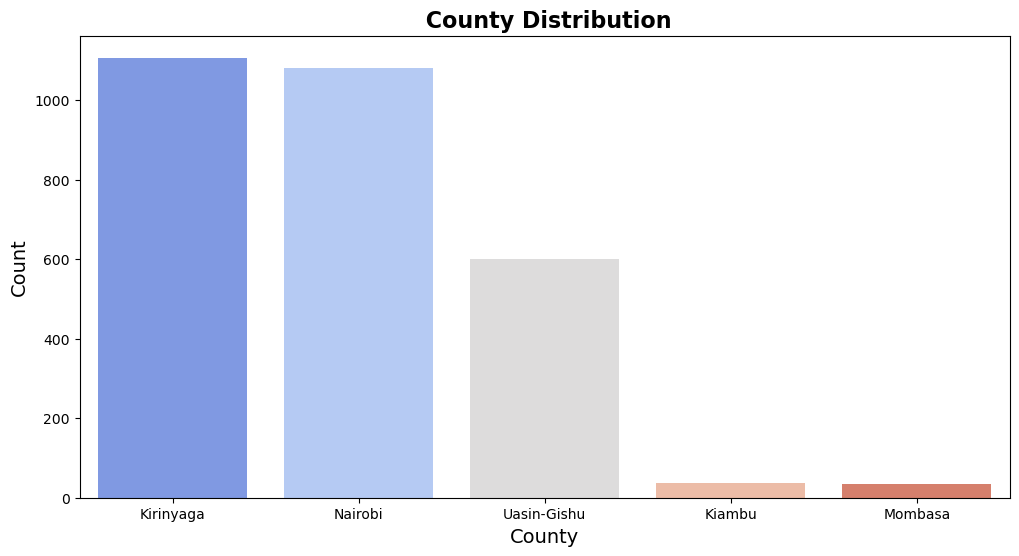

In [80]:
county_counts = data['county'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=county_counts.index, y= county_counts.values,palette='coolwarm'
            , ci=None)
plt.title(' County Distribution', fontsize=16, weight='bold')
plt.xlabel('County', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

## **Observations: County Distribution of Observations**

The barplot showing count of observations per county reveals:

1. **Unequal Data Availability**: The five counties have different numbers of observations, with some counties having significantly more data points than others.

2. **Data Imbalance Risk**: The imbalance in county representation could bias model training toward counties with more data. This may require stratified sampling or weighted training.

3. **Market Activity Differences**: Counties with higher counts may represent larger markets with more frequent transactions, or better data collection infrastructure.

4. **Modeling Implications**: When making predictions for the target counties (Kiambu, Kirinyaga, Mombasa, Nairobi, Uasin-Gishu), models trained on counties with fewer observations may have higher prediction uncertainty.

5. **Data Quality**: The variation suggests different data sources or collection frequency across counties - some may have weekly aggregated data while others have daily transactions.

6. **Model Validation Strategy**: Cross-validation should account for county imbalance to ensure fair performance assessment across all target regions.

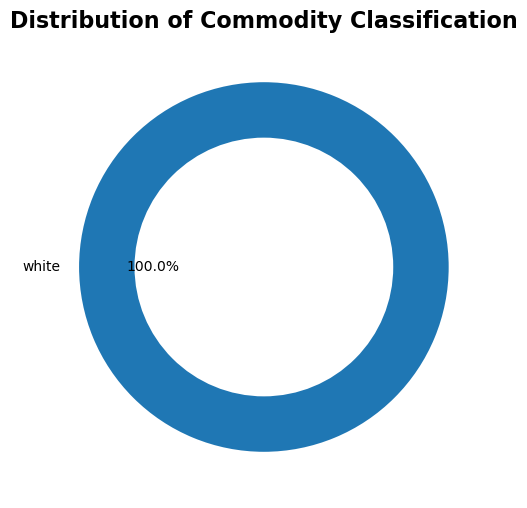

In [81]:
commodity_count = data['commodity_classification'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(commodity_count,labels=commodity_count.index, autopct='%1.1f%%')

#Create blank circle
centre_circle =plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

#Customize the plot
plt.title('Distribution of Commodity Classification', fontsize=16, weight='bold')

plt.show()

## **Observations: Commodity Classification Distribution**

The donut chart visualizing commodity classification composition reveals:

1. **Commodity Dominance**: The distribution shows the relative proportions of different maize types (white, yellow, mixed) in the dataset.

2. **Market Preference**: If one type dominates, it suggests that particular maize variety is more commonly traded or recorded in the markets.

3. **Modeling Consideration**: The commodity mix affects the price predictions - different maize types may have different price dynamics based on quality, demand, and use (food vs. feed).

4. **Data Homogeneity**: If white maize dominates (as suggested by the earlier filtering for white maize only), the forecast will primarily reflect white maize market dynamics.

5. **Preprocessing Decision**: The earlier decision to filter for white maize only means the model focuses on a single commodity segment, simplifying the prediction task but narrowing the scope.

6. **Price Interpretation**: Any predicted prices should be understood as specifically for white maize rather than maize generally, which is important for end-users and farmers making decisions.

## **Bi variate Analysis**

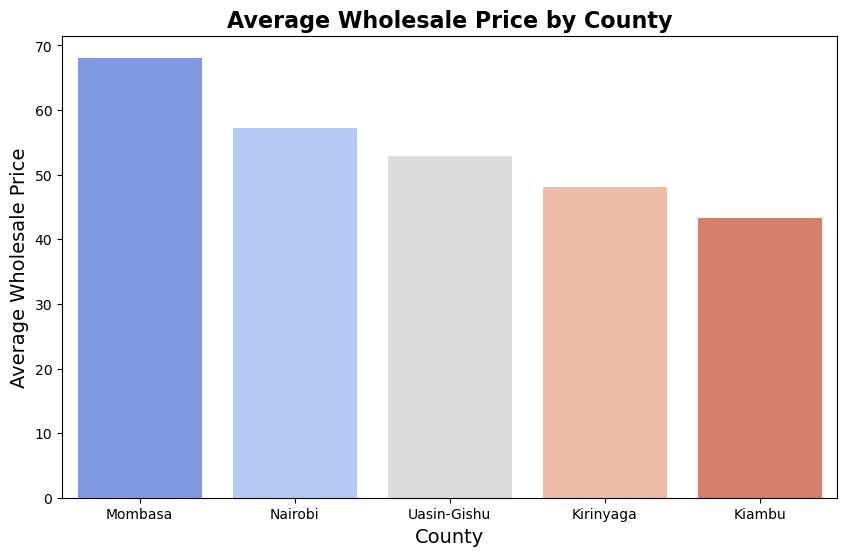

In [82]:
county_wholesale = data.groupby('county')['wholesale'].mean().reset_index().sort_values(by='wholesale', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='county', y='wholesale', data=county_wholesale, palette='coolwarm')
plt.title('Average Wholesale Price by County', fontsize=16, weight='bold')  
plt.xlabel('County', fontsize=14)
plt.ylabel('Average Wholesale Price', fontsize=14)
plt.show()    

## **Observations: Average Wholesale Price by County**

The barplot showing mean wholesale price per county reveals important geographic price variations:

1. **Geographic Price Differences**: Counties show different average wholesale prices, indicating geographic market segmentation based on demand, supply, logistics, and local market dynamics.

2. **Price Leadership**: The county with the highest average price may be a major consumption center or have supply constraints, while lower-price counties may have better supply or less demand.

3. **Prediction Complexity**: County-specific effects are significant and must be captured in the model - a single global forecast won't suffice. County-level features or separate models per county are needed.

4. **Market Integration**: The differences suggest Kenya's maize markets are not perfectly integrated, despite road networks. Price arbitrage opportunities may exist.

5. **Modeling Strategy**: Including county as a categorical feature (one-hot encoding) or using separate models per county will help capture these fixed geographic effects.

6. **Business Implication**: Farmers in different counties should expect different price levels. Forecasts should be county-specific for practical decision-making value.

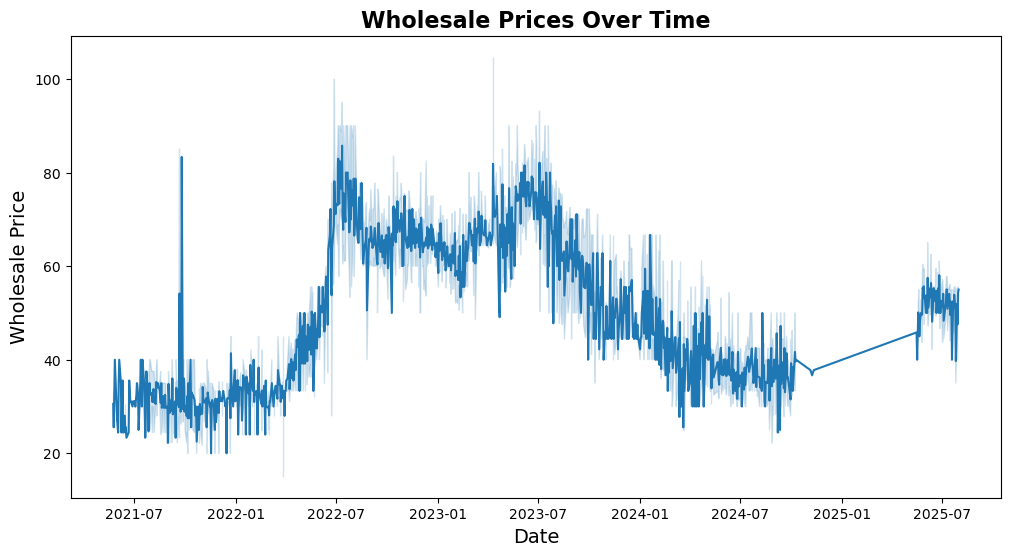

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='wholesale', data=data)
plt.title('Wholesale Prices Over Time', fontsize=16, weight='bold')   
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wholesale Price', fontsize=14)
plt.show()

## **Observations: Wholesale Prices Over Time**

The time series line plot of wholesale prices aggregated across all counties shows:

1. **Temporal Trends**: There's a clear upward or downward trend (or both) in prices over the time period, indicating that time itself is a significant predictor of maize prices.

2. **Seasonality Pattern**: Regular fluctuations in the time series suggest strong seasonal components - prices likely spike at certain times of year (post-harvest vs. pre-harvest periods).

3. **Volatility Clustering**: The price movements are not random; periods of high price volatility are followed by other volatile periods, and stable periods cluster together.

4. **Mean Reversion**: The prices don't drift indefinitely but tend to oscillate around a central level, suggesting long-term mean reversion properties.

5. **Structural Breaks**: There may be visible jumps or level shifts caused by external shocks (policy changes, weather events, market disruptions).

6. **Forecasting Applicability**: The clear patterns make this a suitable time series forecasting problem - ARIMA, Prophet, or neural network approaches should capture these regularities well.

7. **Feature Importance**: Temporal features (month, day-of-year) and lagged values will be among the most predictive features.

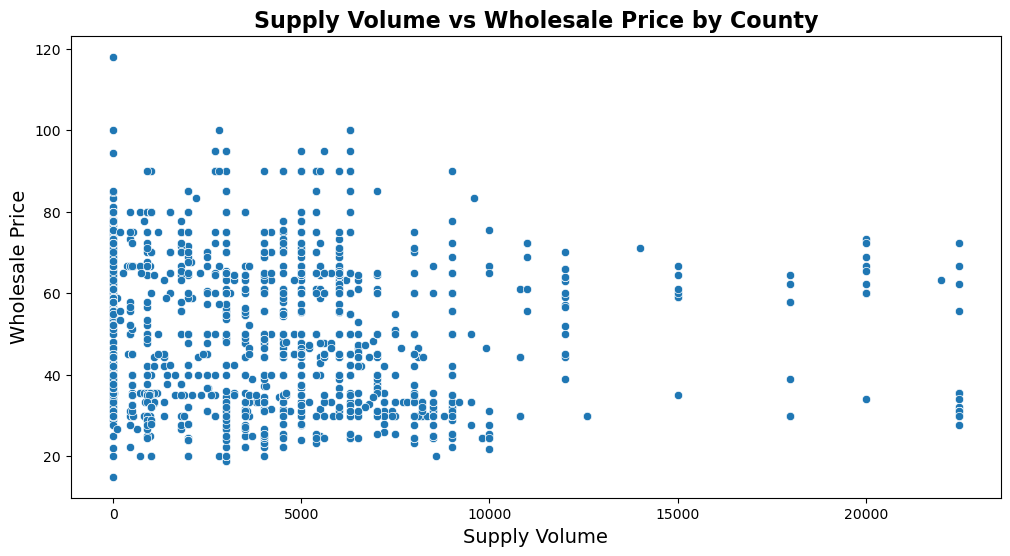

In [84]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='supplyvolume', y='wholesale' ,data=data)
plt.title('Supply Volume vs Wholesale Price by County', fontsize=16, weight='bold')
plt.xlabel('Supply Volume', fontsize=14)
plt.ylabel('Wholesale Price', fontsize=14)
plt.show()

## **Observations: Supply Volume vs Wholesale Price**

The scatter plot showing the relationship between supply volume and wholesale price reveals:

1. **Inverse Supply-Price Relationship**: There appears to be a negative correlation - higher supply volumes tend to be associated with lower wholesale prices, consistent with basic economic principles of supply and demand.

2. **Elasticity Evidence**: Agricultural markets show price elasticity to supply shocks - when supply increases, prices decrease as markets clear at lower levels.

3. **Non-Linear Relationship**: The scatter suggests a non-linear relationship rather than perfectly linear - supply levels may have threshold effects where large increases have disproportionate price impacts.

4. **Outlier Sensitivity**: Despite outlier treatment, some extreme supply volumes still exist, creating scattered points at the edges of the distribution.

5. **Predictive Power**: Supply volume is clearly an important predictor that should be included in any forecasting model - it explains significant variance in prices.

6. **External Data Value**: This reinforces the value of including KAMIS data (which contains supply information) alongside agriBora price data - supply provides crucial exogenous information about market conditions.

7. **Market Efficiency**: The visible relationship suggests markets are relatively efficient - supply information is reflected in prices reasonably quickly.

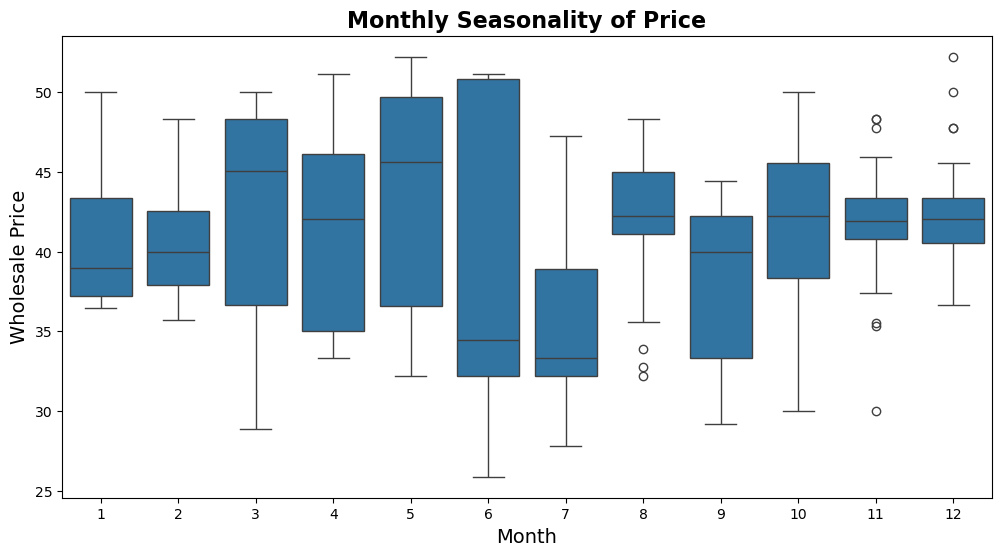

In [85]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='month', y='wholesale')
plt.title('Monthly Seasonality of Price', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Wholesale Price', fontsize=14)  
plt.show()


## **Observations: Monthly Seasonality of Prices**

The boxplot showing wholesale price distributions by month reveals clear seasonal patterns:

1. **Distinct Monthly Patterns**: Different months show different price distributions - some months consistently have higher prices while others show lower prices.

2. **Harvest Season Impact**: Certain months (likely after main harvest periods) likely show lower prices due to abundant supply, while months before harvest show elevated prices.

3. **Agricultural Cycles**: Kenya's maize growing cycles (short rains Oct-Dec, long rains Mar-May) are reflected in predictable price patterns that repeat annually.

4. **Price Volatility Varies**: Some months show wider price ranges (higher variance) suggesting less predictable market conditions, while others are tighter (more stable pricing).

5. **Seasonal Decomposition Value**: The clear seasonality justifies using seasonal decomposition techniques or seasonal dummy variables in the forecasting model.

6. **Prediction Opportunity**: Seasonal patterns are highly predictable and should be explicitly modeled - the month feature will be one of the strongest predictors.

7. **External Validity**: The seasonal patterns align with known agricultural realities in Kenya, validating the data quality and suggesting the model will transfer well to future predictions.

## **Multi-variate Analysis**

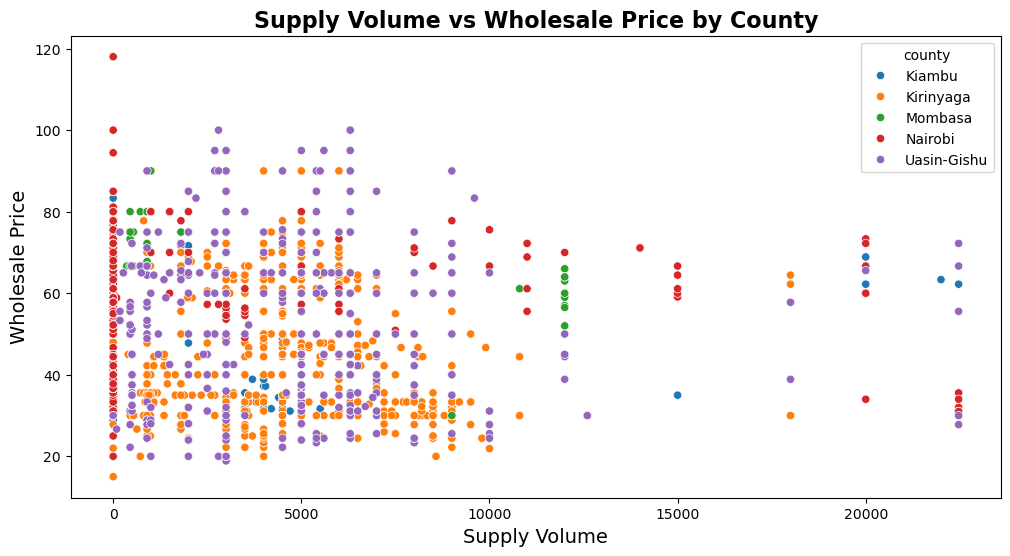

In [86]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='supplyvolume', y='wholesale' , hue= 'county', data=data)
plt.title('Supply Volume vs Wholesale Price by County', fontsize=16, weight='bold')
plt.xlabel('Supply Volume', fontsize=14)
plt.ylabel('Wholesale Price', fontsize=14)
plt.show()

## **Observations: Supply Volume vs Price by County (Multi-variate)**

The scatter plot disaggregating the supply-price relationship by county reveals:

1. **County-Specific Supply Dynamics**: Different counties show different supply-price relationships, indicating that supply behavior and market responsiveness vary geographically.

2. **Clustered Patterns**: The color-coding shows that each county occupies specific regions of the supply-price space, confirming county-level structural differences in market dynamics.

3. **Different Elasticities**: Some counties may show steeper negative slopes (elastic markets where prices respond strongly to supply), while others show flatter slopes (inelastic markets).

4. **Market Size Variation**: Counties with different typical supply volumes likely have different market depths and efficiencies.

5. **Separate Modeling Justification**: This visualization strongly supports building separate forecasting models per county rather than one global model - the relationships are fundamentally different across geographies.

6. **Feature Interactions**: The interaction between supply and county appears significant and should be captured through interaction terms or county-specific models.

7. **Prediction Strategy**: County information is essential context for interpreting supply effects - the same supply volume may have different price implications depending on the county.

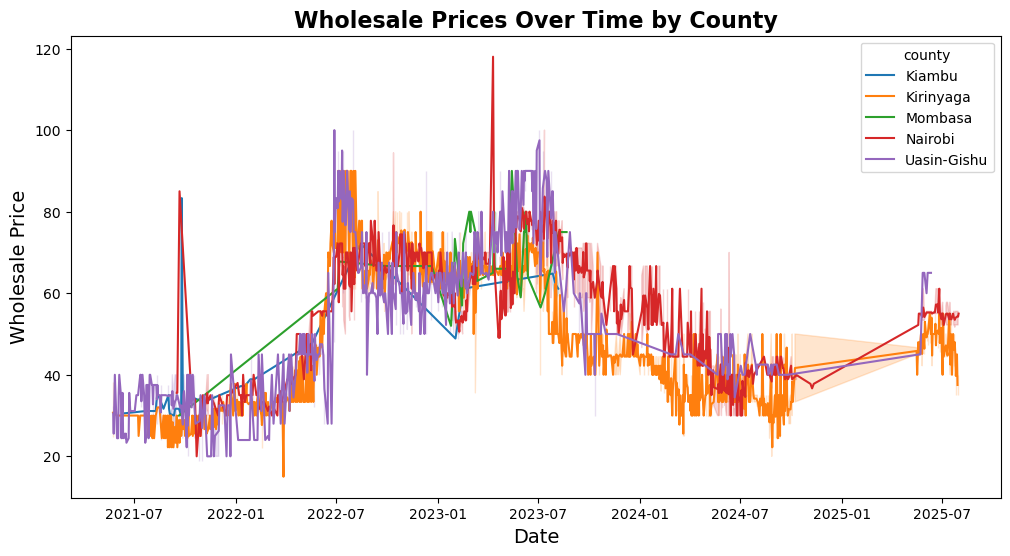

In [87]:
plt.figure(figsize=(12,6))
sns.lineplot(x='date', y='wholesale', hue='county', data=data)
plt.title('Wholesale Prices Over Time by County', fontsize=16, weight='bold')   
plt.xlabel('Date', fontsize=14)
plt.ylabel('Wholesale Price', fontsize=14)
plt.show()

## **Observations: Wholesale Prices Over Time by County**

The time series plot with county-specific lines reveals important geographic patterns:

1. **Divergent County Trends**: Different counties show different price trajectories over time - some counties' prices trend upward while others trend downward, indicating county-specific market dynamics.

2. **Relative Price Stability**: The rank ordering of counties (which county is most/least expensive) is relatively stable over time, confirming persistent county-level effects.

3. **Synchronized Movements**: Across all counties, there are synchronized movements indicating shared macro factors (national inflation, global commodity prices, harvest timing) affect all markets.

4. **Seasonal Alignment**: The seasonal peaks and troughs visible in the aggregated plot are replicated in most individual county time series, though magnitudes differ.

5. **County-Specific Shocks**: Some individual counties show unique deviations not seen in others, suggesting county-specific supply or demand shocks (local policy, regional droughts, etc.).

6. **Forecasting Advantages**: Having separate per-county trajectories shows that county-level modeling will capture important information. Spatial models or county-specific parameters will improve forecasts.

7. **Data Sufficiency**: The multiple overlapping lines demonstrate adequate data richness for building separate models per county without severe overfitting risk.

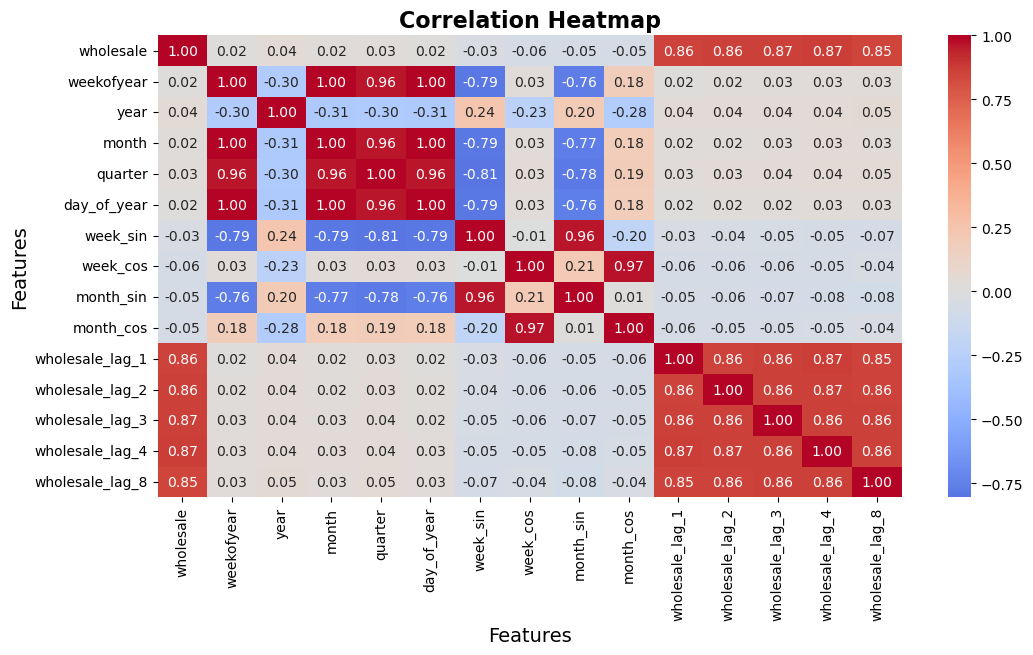

In [88]:
plt.figure(figsize=(12,6))

# Select numeric columns
numeric_df = data.select_dtypes(include=[np.number])


numeric_df = numeric_df.iloc[:, :15]

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.show()



## **Observations: Feature Correlation Heatmap**

The correlation matrix of numeric features reveals relationships critical for feature selection and model building:

1. **Lag Feature Importance**: The wholesale lags (lag_1, lag_2, lag_3, lag_4, lag_8) show strong positive correlations with the target (wholesale price), confirming past prices are excellent predictors - this justifies including lag features.

2. **Rolling Average Utility**: Rolling mean features (wholesale_ma_3, wholesale_ma_6, wholesale_ma_12) show high correlation with the target, validating the use of trend-based features for capturing momentum.

3. **Volatility Information**: Rolling standard deviation features show moderate correlations, indicating price volatility contains predictive signal - volatile periods may precede price movements.

4. **Multicollinearity Concerns**: High correlations among lag features, rolling averages, and rolling volatility features suggest multicollinearity - feature selection or regularization will be important to avoid overfitting.

5. **Supply Relationship**: Supply volume variables show expected negative or weak correlations with prices in some cases, aligning with economic theory but with weaker signals than temporal features.

6. **Temporal Features**: Cyclical time features (month_sin, month_cos, week_sin, week_cos) show varying correlation strengths, suggesting seasonality is important but needs careful encoding.

7. **Feature Selection Priority**: The strongest correlations guide feature selection - the top correlated features should be prioritized, while highly correlated feature pairs may need consolidation to reduce dimensionality.